In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
ds = pd.read_csv('ds_salaries.csv')

In [4]:
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [6]:
ds.shape

(607, 12)

In [7]:
ds.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
ds.company_size.value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

In [9]:
ds.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

### In Which country Data Scientist gets the highest salary?

In [10]:
ds[ds.job_title == 'Data Scientist'].groupby('company_location').agg({'salary_in_usd':'max'}).\
sort_values('salary_in_usd', ascending=False).reset_index().head(5)

,company_location,salary_in_usd
0,US,412000
1,GB,183228
2,CH,122346
3,IL,119059
4,CA,103691


### In which country there is highest mean salary of Data Sientist?

In [11]:
ds[ds.job_title == 'Data Scientist'].groupby('company_location').agg({'salary_in_usd':'mean'}).\
sort_values('salary_in_usd', ascending=False).reset_index().head(5)

,company_location,salary_in_usd
0,US,143115.678571
1,CH,122346.000000
2,IL,119059.000000
3,DZ,100000.000000
4,GB,88177.363636


### Visualize the salaries in different companies depending on their sizes

In [12]:
ds_main = ds[ds.job_title.isin(['Data Scientist','Data Engineer','Data Analyst'])]

Text(0, 0.5, 'Salary in USD')

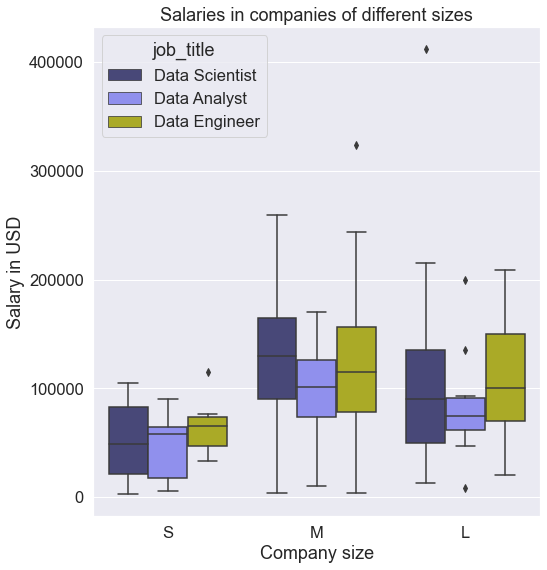

In [13]:
sns.set(rc={'figure.figsize':(8,9)})
sns.set(font_scale=1.5)
sns.boxplot(x='company_size', y='salary_in_usd', data=ds_main, palette='gist_stern', order=['S','M','L'], hue='job_title').\
set(title='Salaries in companies of different sizes')
plt.xlabel("Company size")
plt.ylabel("Salary in USD")

Text(0, 0.5, 'Salary in USD')

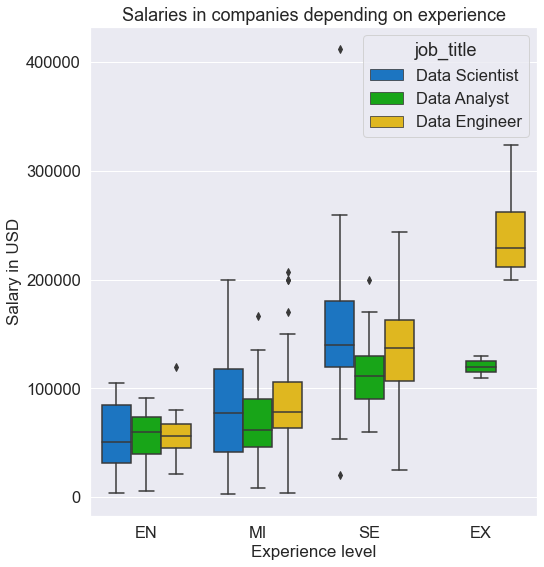

In [14]:
sns.set(rc={'figure.figsize':(8,9)})
sns.set(font_scale=1.5)
a = sns.boxplot(x='experience_level', y='salary_in_usd', data=ds_main, palette='nipy_spectral', order=['EN','MI','SE','EX'],\
            hue='job_title').set(title='Salaries in companies depending on experience')
plt.xlabel("Experience level", fontsize=17)
plt.ylabel("Salary in USD", fontsize=17)